In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt

# Convolutional Neural Network's Architecture

In [4]:
model = models.Sequential()

# Conv1

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-5), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv 2

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv 3

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv 3

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.25))

# Flatten Layer

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

# Output Layer

model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)       

# Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = train_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [9]:
checkpoint = ModelCheckpoint('best.hdf5',monitor='val_accuracy', verbose= 0, save_best_only=True)

In [10]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [11]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 verbose=0,
                 callbacks=[checkpoint, TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-11-09 03:01:59.891084: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-09 03:02:03.287421: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


# Results

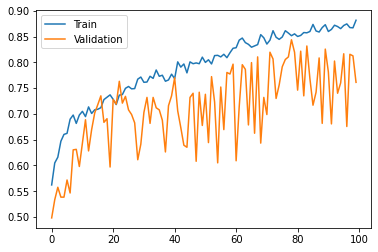

In [12]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150, 150),
                                 batch_size=64,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [17]:
best_model = model
best_model.load_weights('./best.hdf5')

In [18]:
best_model.evaluate(test_generator)

16/16 [==============================] - 9s 530ms/step - loss: 0.5016 - accuracy: 0.8180


[0.5015676021575928, 0.8180000185966492]